In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [58]:
df = pd.read_csv('IMDB Dataset.csv')
df1 = df.copy()
mapping = { "positive" : 1, "negative": 0}
df1["sentiment"] = df1["sentiment"].map(mapping)
df1.head(100)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
95,Daniel Day-Lewis is the most versatile actor a...,1
96,My guess would be this was originally going to...,0
97,"Well, I like to watch bad horror B-Movies, cau...",0
98,"This IS the worst movie I have ever seen, as w...",0


In [59]:
df.columns


Index(['review', 'sentiment'], dtype='object')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [61]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [62]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [63]:
# label = df.Label.value_counts().values
# plt.pie(label, labels= label)
# plt.show()

In [64]:
df.nunique()


review       49582
sentiment        2
dtype: int64

In [65]:
df.shape

(50000, 2)

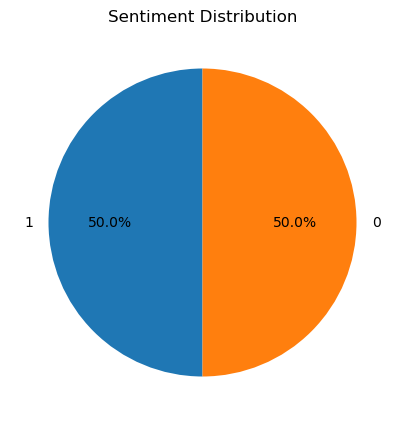

<Axes: ylabel='count'>

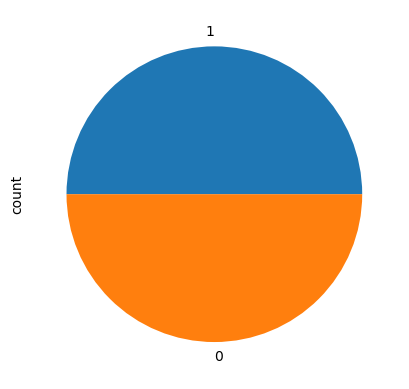

In [66]:
sentiment_counts = df1["sentiment"].value_counts()

#Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    sentiment_counts.values,
    labels=sentiment_counts.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Sentiment Distribution")
plt.show()
df1['sentiment'].value_counts().plot(kind='pie')
# df.shape

In [67]:
# Find domains that appear more than once
duplicate_domains = df['Domain'][df['Domain'].duplicated()].unique()

# Filter the DataFrame for these domains
repeated_rows = df[df['Domain'].isin(duplicate_domains)]

# Sort by domain for grouping
repeated_rows = repeated_rows.sort_values(by='Domain')
# Group by 'Domain' and count occurrences
domain_counts = df['Domain'].value_counts().reset_index()

# Rename columns for clarity
domain_counts.columns = ['Domain', 'Count']

# Filter only domains that appear more than once
duplicate_domains_table = domain_counts[domain_counts['Count'] > 1]

# Display the table
print(duplicate_domains_table)

# If you want to see ALL rows of those repeated domains with their features:
repeated_rows = df[df['Domain'].isin(duplicate_domains_table['Domain'])]
display(repeated_rows.sort_values(by='Domain'))

# Display as a table
repeated_rows.head(200)


KeyError: 'Domain'

In [ ]:
# Group by 'Domain' and count occurrences
domain_counts = df['Domain'].value_counts().reset_index()

# Rename columns for clarity
domain_counts.columns = ['Domain', 'Count']

Filter only domains that appear more than once
duplicate_domains_table = domain_counts[domain_counts['Count'] > 1]

# Display the table
print(duplicate_domains_table)

# If you want to see ALL rows of those repeated domains with their features:
repeated_rows = df[df['Domain'].isin(duplicate_domains_table['Domain'])]
display(repeated_rows.sort_values(by='Domain'))


In [ ]:
# Replace 'Domain' with your actual column name for domain
domain_to_check = 'torcache.net'  # Example: first domain in your screenshot

# Filter the rows where Domain matches
filtered_rows = df[df['Domain'] == domain_to_check]

# Display the result
filtered_rows


In [ ]:
import pandas as pd

# Assuming your dataframe is df
# Drop duplicates based on the Domain column
unique_df = df.drop_duplicates(subset='Domain')

# Calculate value counts of labels
label_counts = unique_df['Label'].value_counts()

# Calculate percentages
label_percentages = (label_counts / len(unique_df)) * 100

# Combine counts and percentages into one table
result = pd.DataFrame({
    'Count': label_counts,
    'Percentage': label_percentages.round(2)
})

print(result)
